#### Name: Ananya Godse   SAPID: 60009220161

# Decision Tree Classifier - Breast Cancer Dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Loading the Dataset

In [2]:
df = pd.read_csv("breast_cancer.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


### Splitting the Training & Testing Data

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Fitting the Classifier & Determining the Best Parameters

In [7]:
train_scores = []
test_scores = []
for i in range(1, 7):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    predictions = clf.predict(X_test)
    train_score = accuracy_score(y_train, y_pred_train)
    test_score = accuracy_score(y_test, predictions)
    print(f"Max Depth = {i} Train Score = {train_score} Test Score ={test_score}")
    train_scores.append(train_score)
    test_scores.append(test_score)

Max Depth = 1 Train Score = 0.8879120879120879 Test Score =0.9035087719298246
Max Depth = 2 Train Score = 0.8879120879120879 Test Score =0.9035087719298246
Max Depth = 3 Train Score = 0.9274725274725275 Test Score =0.8859649122807017
Max Depth = 4 Train Score = 0.9428571428571428 Test Score =0.9035087719298246
Max Depth = 5 Train Score = 0.9604395604395605 Test Score =0.9122807017543859
Max Depth = 6 Train Score = 0.9802197802197802 Test Score =0.9210526315789473


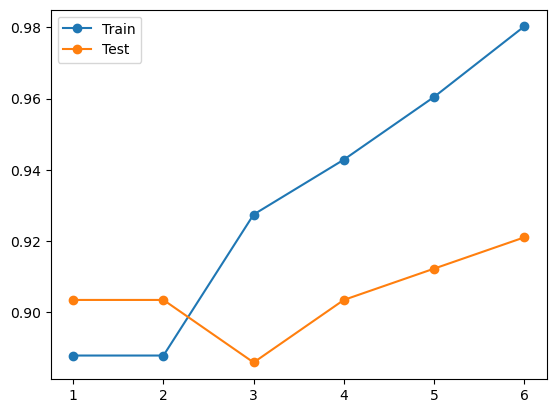

In [8]:
max_depth = [i for i in range(1, 7)]
plt.plot(max_depth, train_scores, '-o', label="Train")
plt.plot(max_depth, test_scores, '-o', label="Test")
plt.legend()
plt.show()

The test scores start drops at max depth = 3. Therefore, the best value for max depth = 2